In [1]:
import pandas as pd

try:
  df = pd.read_csv('/content/drive/MyDrive/di_bootcamp_resources/week_9/Student Mental health.csv')
  display(df.head())
except FileNotFoundError:
  print("Error: The file was not found. Please make sure the file path is correct and that Google Drive is mounted and accessible.")
except Exception as e:
  print(f"An error occurred: {e}")

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


Exercise 1

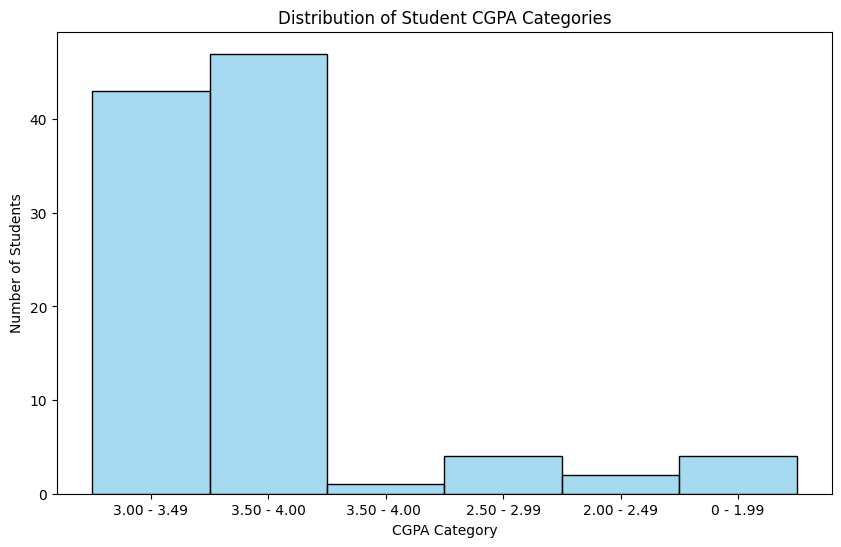

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use Seaborn's histplot to create a histogram of the CGPA categories
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='What is your CGPA?', color='skyblue')

# Customize the histogram with an appropriate color and add a title
plt.title('Distribution of Student CGPA Categories')
plt.xlabel('CGPA Category')
plt.ylabel('Number of Students')

# Display the plot
plt.show()

Exercise 2

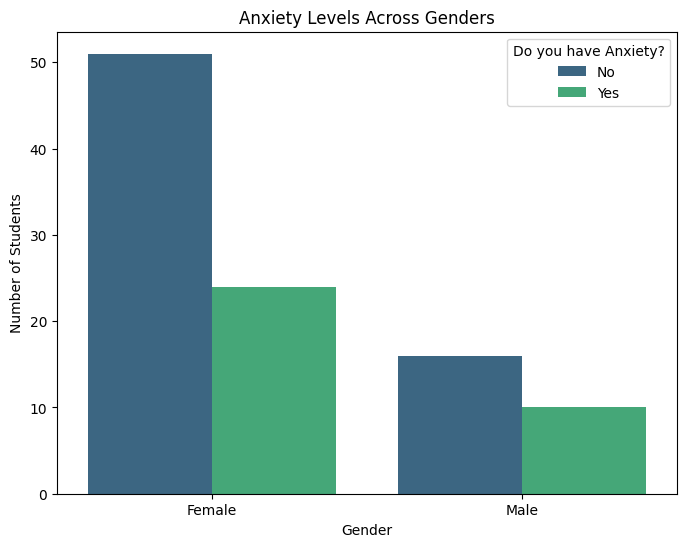

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot using Seaborn to compare anxiety levels across genders
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Choose your gender', hue='Do you have Anxiety?', palette='viridis')

# Add a title to your plot
plt.title('Anxiety Levels Across Genders')
plt.xlabel('Gender')
plt.ylabel('Number of Students')

# Display the plot
plt.show()

Exercise 3

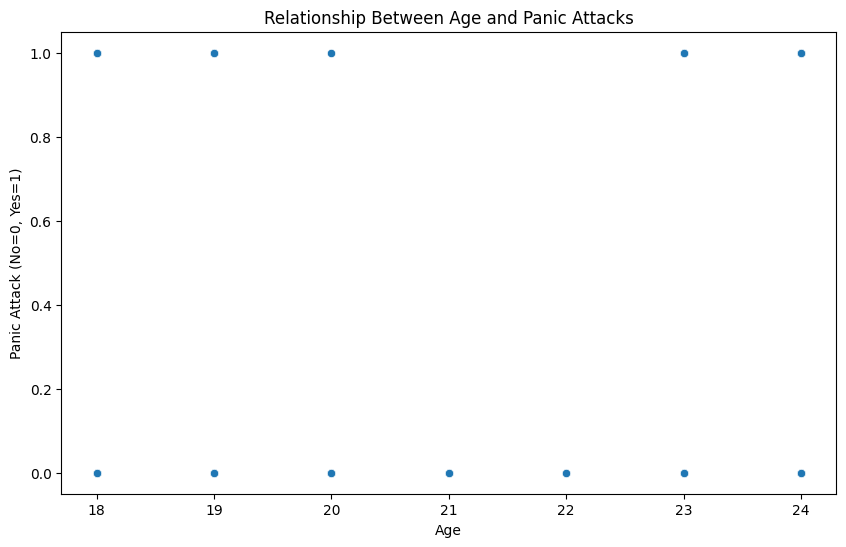

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Do you have Panic attack?' to numeric
df['Panic_Attack_Numeric'] = df['Do you have Panic attack?'].apply(lambda x: 1 if x == 'Yes' else 0)

# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
# Customize the scatter plot to improve readability (e.g., add jitter for better visualization of overlapping points)
# Adding some jitter to the y-axis to better visualize overlapping points
sns.scatterplot(data=df, x='Age', y='Panic_Attack_Numeric')


# Add a title
plt.title('Relationship Between Age and Panic Attacks')
plt.xlabel('Age')
plt.ylabel('Panic Attack (No=0, Yes=1)')

# Display the plot
plt.show()

Exercise 4

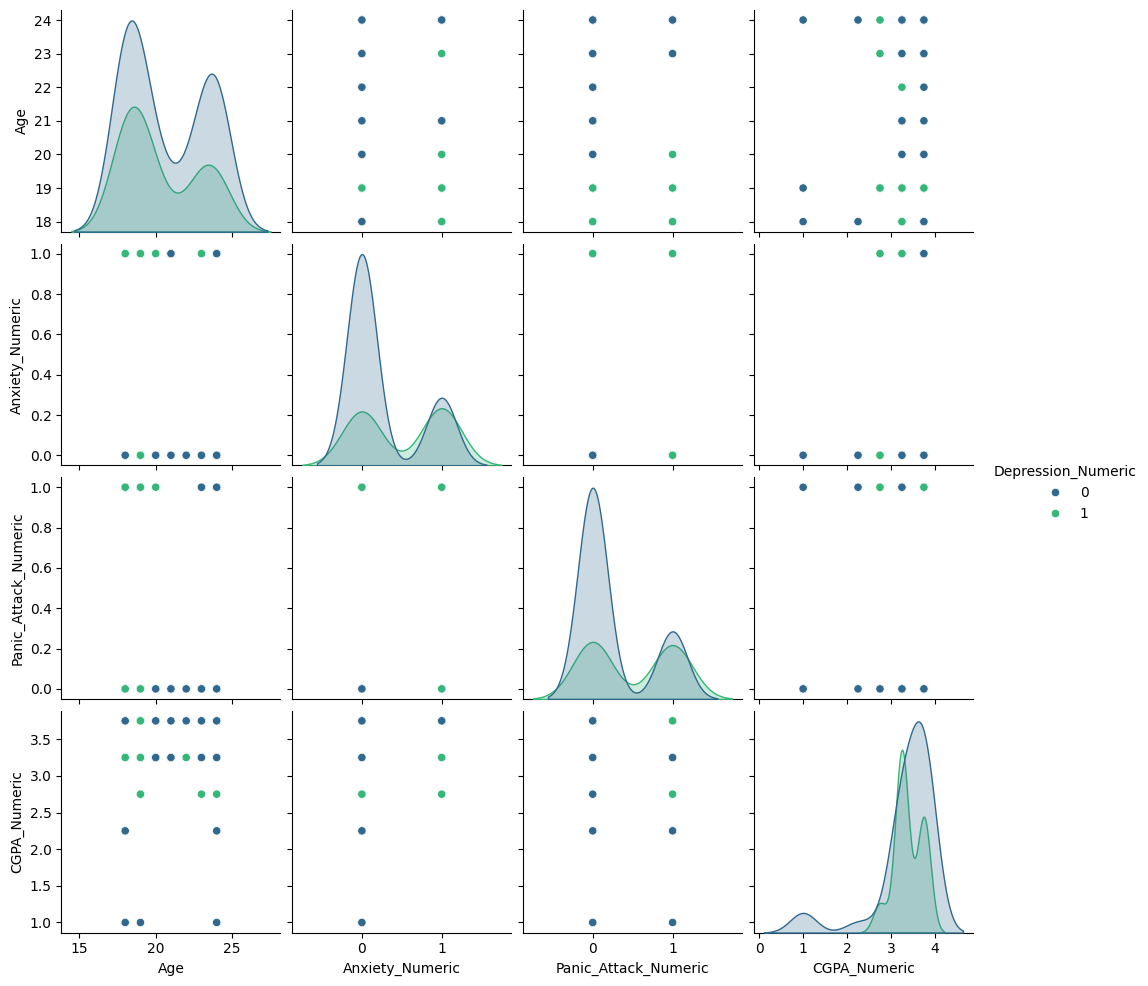

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select relevant columns
selected_cols = ['Age', 'What is your CGPA?', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']
df_selected = df[selected_cols].copy()

# Convert mental health columns to numeric (Yes=1, No=0)
df_selected['Depression_Numeric'] = df_selected['Do you have Depression?'].apply(lambda x: 1 if x == 'Yes' else 0)
df_selected['Anxiety_Numeric'] = df_selected['Do you have Anxiety?'].apply(lambda x: 1 if x == 'Yes' else 0)
df_selected['Panic_Attack_Numeric'] = df_selected['Do you have Panic attack?'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert CGPA ranges to numerical midpoints
cgpa_mapping = {
    '0 - 1.99': 1.0,
    '2.00 - 2.49': 2.25,
    '2.50 - 2.99': 2.75,
    '3.00 - 3.49': 3.25,
    '3.50 - 4.00': 3.75
}
df_selected['CGPA_Numeric'] = df_selected['What is your CGPA?'].map(cgpa_mapping)

# Drop the original categorical columns
df_selected = df_selected.drop(columns=['What is your CGPA?', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?'])


# Use Seaborn's pairplot
sns.pairplot(df_selected, hue='Depression_Numeric', palette='viridis')

# Display the plot
plt.show()

Exercise 5

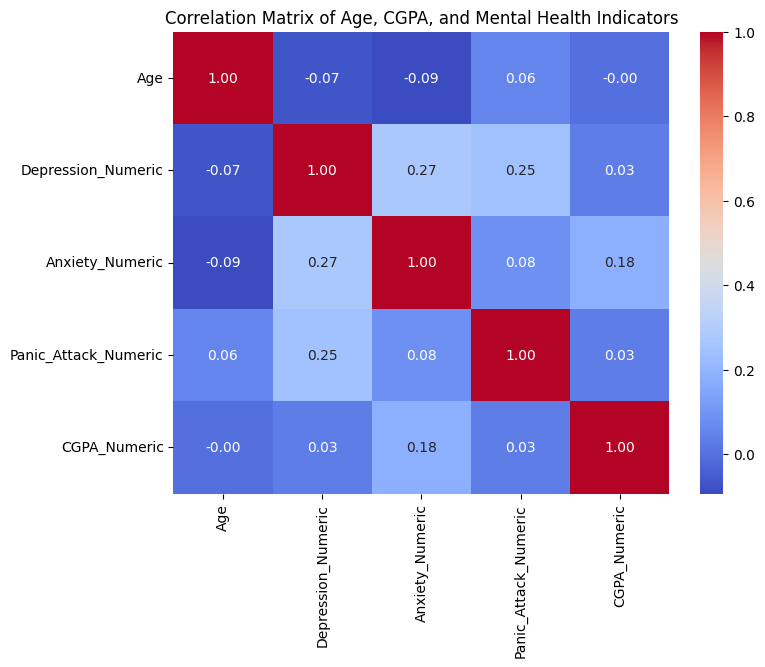

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Use Seaborn's heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title
plt.title('Correlation Matrix of Age, CGPA, and Mental Health Indicators')

# Display the plot
plt.show()

Exercise 6

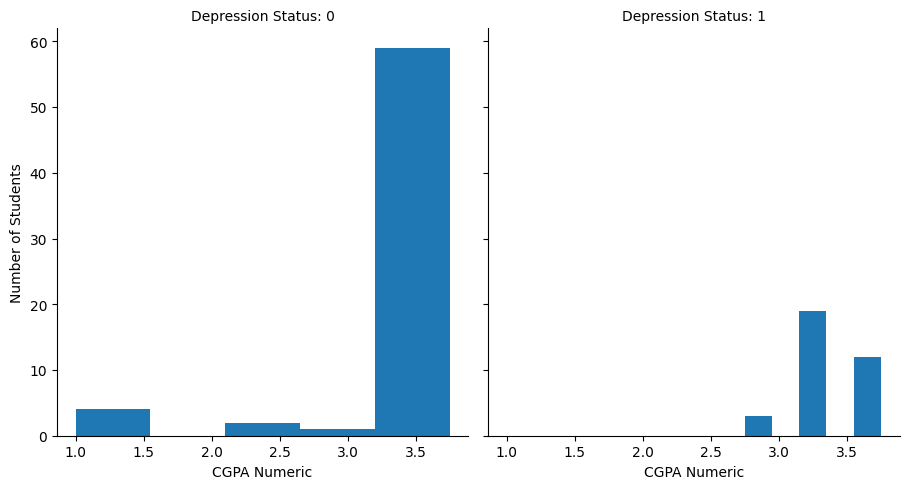

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use Seaborn's FacetGrid to create a grid of histograms for CGPA, segmented by depression status
g = sns.FacetGrid(df_selected, col='Depression_Numeric', height=5, aspect=0.9)
g.map(plt.hist, 'CGPA_Numeric', bins=5) # Adjust bins as needed

# Add titles and labels for clarity
g.set_axis_labels('CGPA Numeric', 'Number of Students')
g.set_titles('Depression Status: {col_name}')

# Display the plot
plt.show()